# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown  
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet  
  
<h3>Resources</h3>  
  
+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm  
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
  
****
</div>

In [86]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [87]:
# Your work here.
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [88]:
len(df)

130

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

### 1. Is the distribution of body temperatures normal?

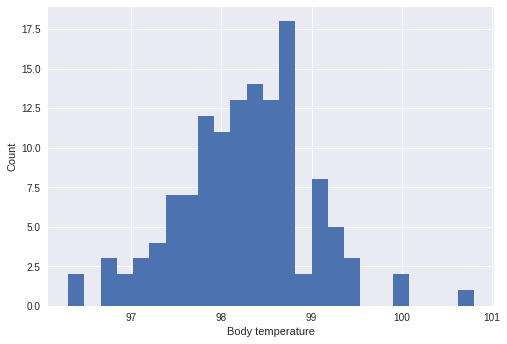

In [90]:
# distribution of temperature
plt.hist(df.temperature, bins=25)
plt.xlabel('Body temperature')
plt.ylabel('Count')
plt.show()

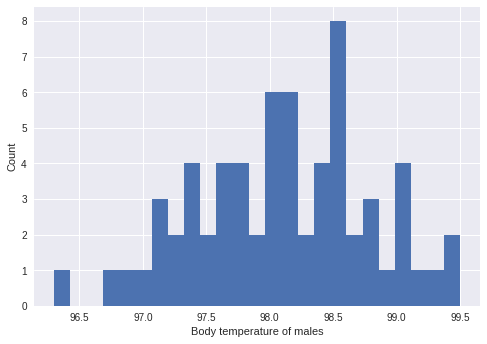

In [91]:
# distribution of temperature for male
plt.hist(df[df.gender=='M'].temperature, bins=25)
plt.xlabel('Body temperature of males')
plt.ylabel('Count')
plt.show()

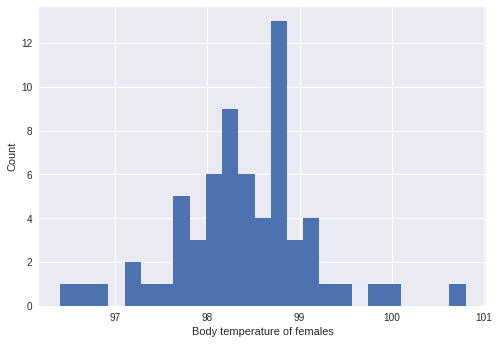

In [92]:
# distribution of temperature for female
plt.hist(df[df.gender=='F'].temperature, bins=25)
plt.xlabel('Body temperature of females')
plt.ylabel('Count')
plt.show()

/home/toniachu/ProgramFiles/Anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


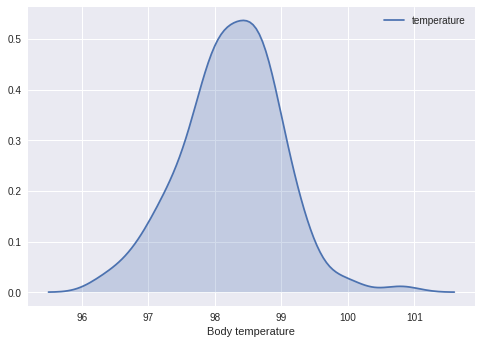

In [93]:
# distribution of temperature
sns.kdeplot(df.temperature, shade=True)
plt.xlabel('Body temperature')
plt.show()

/home/toniachu/ProgramFiles/Anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


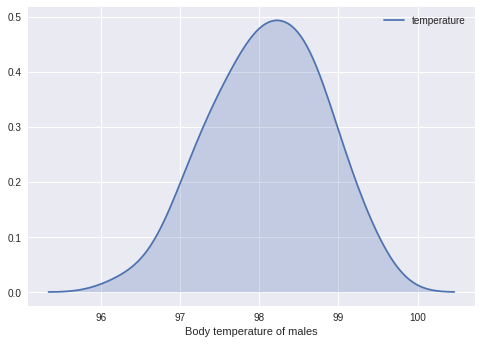

In [94]:
# distribution of temperature for male
sns.kdeplot(df[df.gender=='M'].temperature, shade=True)
plt.xlabel('Body temperature of males')
plt.show()

/home/toniachu/ProgramFiles/Anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


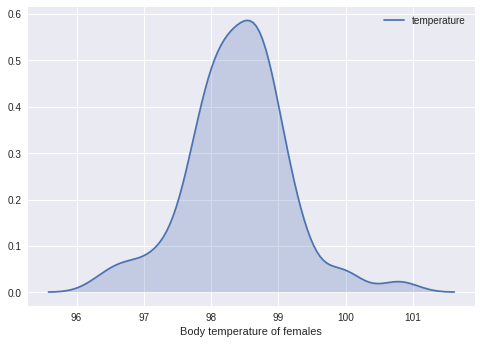

In [95]:
# distribution of temperature for male
sns.kdeplot(df[df.gender=='F'].temperature, shade=True)
plt.xlabel('Body temperature of females')
plt.show()

From above plots, we can see that the distribution of body temperature is normal.

### 2. Is the sample size large? Are the observations independent?

In [96]:
# Total sample size
n = len(df)
n

130

In [97]:
# Sample size of male
nm = len(df[df.gender=='M'])

In [98]:
# Sample size of female
nf = len(df[df.gender=='F'])

The sample size is not large. The observations are independent.

### 3. Is the true population mean really 98.6 degrees F?
 * Would you use a one-sample or two-sample test? Why?
 * In this situation, is it appropriate to use the t or z statistic?
 * Now try using the other test. How is the result be different? Why?

In [99]:
# mean temperature of all samples
temperature_mean = df.temperature.sum() / n
temperature_mean

98.24923076923078

In [100]:
# mean temperature of males
temperature_mean_m = df[df.gender=='M'].temperature.sum() / len(df[df.gender=='M'])
temperature_mean_m

98.1046153846154

In [101]:
# mean temperature of females
temperature_mean_f = df[df.gender=='F'].temperature.sum() / len(df[df.gender=='M'])
temperature_mean_f

98.39384615384613

* I would use a one-sample test. Because the hypothesis of interest can be expressed as:  
    H0: mu=98.6  
    Ha: mu<98.6  

* In this situation, I think it is appropriate to use the z statistic. Because we have 130 observations, it's bigger than 30.

In [102]:
# Sample mean
mu = temperature_mean

In [103]:
# Sample variance
df1 = (df.temperature-mu)*(df.temperature-mu)
S2 = df1.sum() / (n-1)

In [104]:
# Sample standard deviation
S = math.sqrt(S2)

In [105]:
# One standard deviation
Dx = S / math.sqrt(n)

In [106]:
Dx

0.06430441683789101

In [107]:
# look up in Z table for 95% confidence interval, we get 
t=1.96
mu_min = mu - t * Dx
mu_max = mu + t * Dx
mu_min, mu_max

(98.12319411222852, 98.37526742623304)

In [108]:
# look up in Z table for 99% conficence interval, we get 
t=2.58
mu_min = mu - t * Dx
mu_max = mu + t * Dx
mu_min, mu_max

(98.08332537378902, 98.41513616467253)

The true population mean isn't 98.6 degrees F. Because we have 95% confidence that the mean body temperature is between 98.12 to 98.38 degrees F. And we have 99% confidence that the mean body temperature is between 98.08 to 98.42 degrees F. They all excludes the value 98.6 degrees F.

* Try using t test

In [109]:
# look up in T table for 95% confidence interval, we get 
t=1.657
mu_min = mu - t * Dx
mu_max = mu + t * Dx
mu_min, mu_max

(98.14267835053039, 98.35578318793117)

In [110]:
# look up in T table for 99% confidence interval, we get 
t=2.356
mu_min = mu - t * Dx
mu_max = mu + t * Dx
mu_min, mu_max

(98.09772956316071, 98.40073197530084)

we have 95% confidence that the mean body temperature is between 98.14 to 98.36 degrees F. And we have 99% confidence that the mean body temperature is between 98.10 to 98.40 degrees F. They all excludes the value 98.6 degrees F. The result of t test has smaller range, because t test is for small sample size. 

### 4. At what temperature should we consider someone's temperature to be "abnormal"?

As we just tested, we have 99% confidence that the mean body temperature is between 98.08 to 98.42 degrees F. So if someone's temperature is higher than 98.42 degrees F, we should consider it to be "abnormal".

### 5. Is there a significant difference between males and females in normal temperature?
* What test did you use and why?
* Write a story with your conclusion in the context of the original problem.

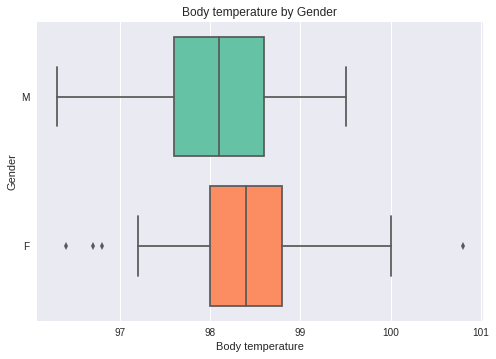

In [111]:
# Boxplot of life expectancy, male and female
sns.boxplot(df.temperature, df.gender, order=["M", "F"], palette="Set2", saturation=1)
plt.ylabel('Gender')
plt.xlabel('Body temperature')
plt.title('Body temperature by Gender')
plt.show()

* I use two sample t test, because we are comparing the difference of males and females sample.

In [112]:
# Sample mean temperatures
mu_m = temperature_mean_m
mu_f = temperature_mean_f

In [113]:
# Sample variance
dfm = (df[df.gender=="M"].temperature-mu_m)*(df[df.gender=="M"].temperature-mu_m)
SS_m = dfm.sum()
dff = (df[df.gender=="F"].temperature-mu_f)*(df[df.gender=="F"].temperature-mu_f)
SS_f = dff.sum()

In [114]:
Sp2 = (SS_m + SS_f) / (nm - 1 + nf - 1)

In [115]:
# Standard deviation of the sample distribution of sample mean differences
Dmm = math.sqrt(Sp2/nm + Sp2/nf)

In [116]:
nm-1 + nf-1

128

In [117]:
# Check two-tailed T table with 128 for 99% confidence interval, we get 
t=2.235
mud = mu_f - mu_m
mud

0.289230769230727

In [118]:
mud_min = mud - t * Dmm
mud_max = mud + t * Dmm
mud_min, mud_max

(0.006382690042414929, 0.5720788484190391)

From the t test result, we have 99% confidence that body temperature difference of females and males is between 0.006 and 0.572 degrees F. So there's no significant difference between males and females in normal temperature.

* The mean normal body temperature was held to be 37 ∘ C or 98.6 ∘ F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, this value is not statistically correct due to our test. From our test result, we have 99% confidence that the mean body temperature is between 98.08 to 98.42 degrees F. So if someone's temperature is higher than 98.42 degrees F, we should consider it to be "abnormal". There's no significant difference between males and females in normal temperature.  